# Motivation

- V + L could add new invariances?

In [1]:
models = ['clip', 'albef', 'vilt']

In [2]:
from pathlib import Path
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist, squareform, pdist
from scipy.stats import ttest_rel
import seaborn as sns
import torch

from fsk.config import layers, feature_types
from fsk.dataprep.utils import get_synsets_ids, get_fsk_features
from fsk.it_match.load import get_match
from fsk.similarity.sem_distances import get_mcrae_features

from IPython.display import Image

In [3]:
project_path = Path('/Users/m_vilas/projects/fsk-multimodal')
res_path = project_path / 'results/'
rsa_path = res_path / 'rsa'
image_path = project_path / 'dataset/things/object_images'

In [4]:
synsets_imgs, concepts = get_synsets_ids(project_path / 'dataset')
fsk_ft = get_fsk_features(project_path / 'dataset')

### Can V + L models detect concepts in images?

- Show concept prediction accuracy

- Correlate concept detection accuracies with properties outlined here: https://www.sc.edu/study/colleges_schools/artsandsciences/psychology/research_clinical_facilities/scope/search.php

### Distances in concept detection co-vary with different properties of the stimuli

__Q__: To what can we relate to that a network thinks a concept is present?

- Show correlation between distances of concept detection and distances of human similarity judgements and networks similarity judgments

    - add gensim for words that appear in the same context?

In [5]:
compare = {
    'clip': ['sem_mcrae', 'vit_32', 'gpt'], 
    'vilt':['sem_mcrae', 'vit_32', 'bert'],
    'albef': ['sem_mcrae', 'vit_16', 'bert']
}
def plot_pred_similarity(m):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    for c, ax in zip(compare[m], axes.flat):
        file = rsa_path / f'{m}_pred_{c}.pkl'
        with open(file, 'rb') as f:
            res = pickle.load(f)
        res = pd.DataFrame(res, columns=['model', 'comparison_model', 'corr', 'p_val'])
        display(res)
        res['corr'] = - res['corr']
        sns.barplot(
            x='comparison_model', y='corr', data=res, ax=ax
        )
        ax.set(ylim=(0, 0.35))
        ax.set(xlabel=None, ylabel='Correlation')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, size=13)
        # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
        #           ncol=6, fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()


,model,comparison_model,corr,p_val
0,clip_pred,sem,-0.193731,0.0
1,clip_pred,sem_taxonomic,-0.115673,0.0
2,clip_pred,sem_encyclopaedic,-0.124506,0.0
3,clip_pred,sem_function,-0.089732,0.0
4,clip_pred,sem_visual_perceptual,-0.197777,0.0
5,clip_pred,sem_other_perceptual,-0.155701,0.0


,model,comparison_model,corr,p_val
0,clip_pred,vit_32_img-hs_0,-0.131120,0.0
1,clip_pred,vit_32_img-hs_1,-0.192523,0.0
2,clip_pred,vit_32_img-hs_2,-0.199938,0.0
3,clip_pred,vit_32_img-hs_3,-0.215882,0.0
4,clip_pred,vit_32_img-hs_4,-0.234592,0.0
5,clip_pred,vit_32_img-hs_5,-0.253256,0.0
6,clip_pred,vit_32_img-hs_6,-0.262576,0.0
7,clip_pred,vit_32_img-hs_7,-0.259814,0.0
8,clip_pred,vit_32_img-hs_8,-0.260924,0.0
9,clip_pred,vit_32_img-hs_9,-0.240259,0.0


,model,comparison_model,corr,p_val
0,clip_pred,gpt_txt-hs_0,-0.091421,0.0
1,clip_pred,gpt_txt-hs_1,-0.164351,0.0
2,clip_pred,gpt_txt-hs_2,-0.162623,0.0
3,clip_pred,gpt_txt-hs_3,-0.151741,0.0
4,clip_pred,gpt_txt-hs_4,-0.179858,0.0
5,clip_pred,gpt_txt-hs_5,-0.177193,0.0
6,clip_pred,gpt_txt-hs_6,-0.184246,0.0
7,clip_pred,gpt_txt-hs_7,-0.183190,0.0
8,clip_pred,gpt_txt-hs_8,-0.193945,0.0
9,clip_pred,gpt_txt-hs_9,-0.195928,0.0


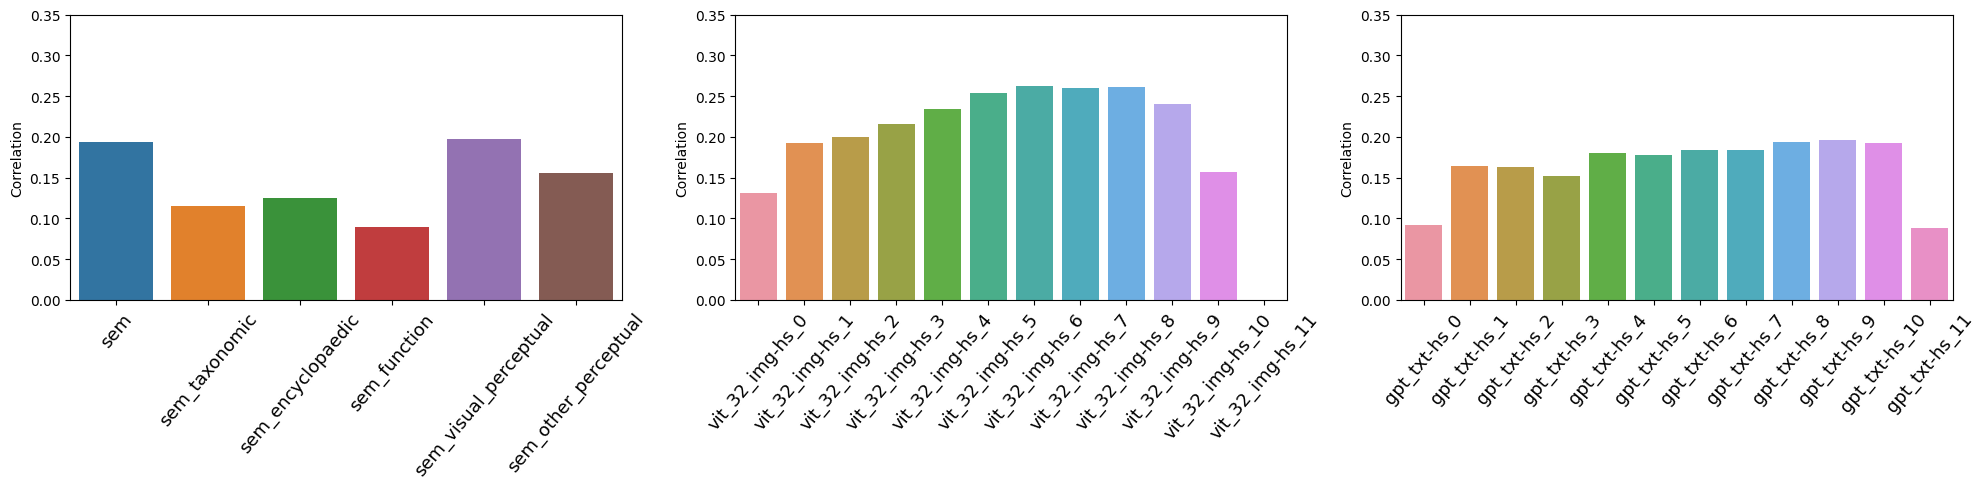

In [6]:
plot_pred_similarity('clip')

,model,comparison_model,corr,p_val
0,albef_pred,sem,-0.023733,0.000
1,albef_pred,sem_taxonomic,-0.061249,0.000
2,albef_pred,sem_encyclopaedic,-0.046658,0.000
3,albef_pred,sem_function,-0.050494,0.000
4,albef_pred,sem_visual_perceptual,-0.013538,0.001
5,albef_pred,sem_other_perceptual,-0.079929,0.000


,model,comparison_model,corr,p_val
0,albef_pred,vit_16_img-hs_0,0.018627,0.000
1,albef_pred,vit_16_img-hs_1,0.007766,0.061
2,albef_pred,vit_16_img-hs_2,0.000738,0.858
3,albef_pred,vit_16_img-hs_3,0.005149,0.214
4,albef_pred,vit_16_img-hs_4,0.002308,0.577
5,albef_pred,vit_16_img-hs_5,0.007572,0.067
6,albef_pred,vit_16_img-hs_6,0.001058,0.798
7,albef_pred,vit_16_img-hs_7,-0.004248,0.305
8,albef_pred,vit_16_img-hs_8,-0.016755,0.000
9,albef_pred,vit_16_img-hs_9,-0.038494,0.000


,model,comparison_model,corr,p_val
0,albef_pred,bert_txt-hs_0,-0.212295,0.0
1,albef_pred,bert_txt-hs_1,-0.251772,0.0
2,albef_pred,bert_txt-hs_2,-0.170805,0.0
3,albef_pred,bert_txt-hs_3,-0.154701,0.0
4,albef_pred,bert_txt-hs_4,-0.119137,0.0
5,albef_pred,bert_txt-hs_5,-0.142811,0.0
6,albef_pred,bert_txt-hs_6,-0.152494,0.0
7,albef_pred,bert_txt-hs_7,-0.086949,0.0
8,albef_pred,bert_txt-hs_8,-0.154123,0.0
9,albef_pred,bert_txt-hs_9,-0.174121,0.0


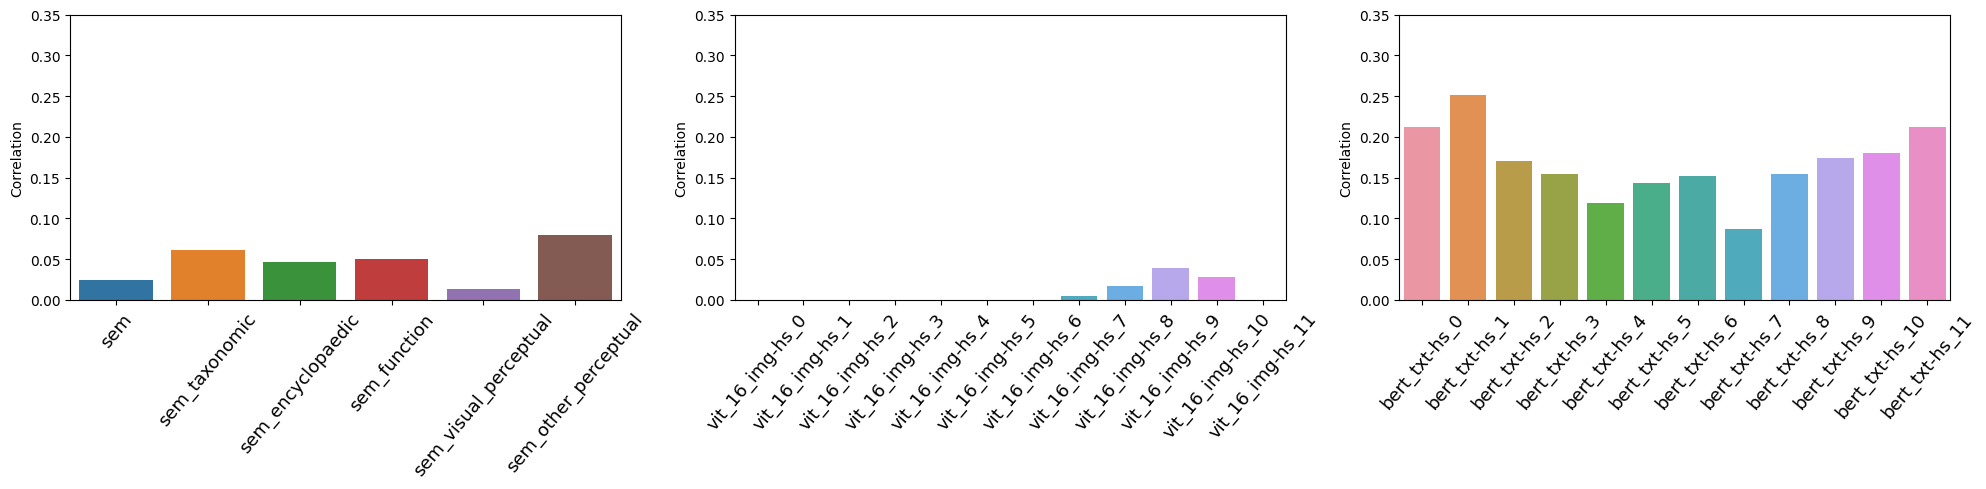

In [7]:
plot_pred_similarity('albef')

,model,comparison_model,corr,p_val
0,vilt_pred,sem,-0.301877,0.0
1,vilt_pred,sem_taxonomic,-0.303006,0.0
2,vilt_pred,sem_encyclopaedic,-0.156646,0.0
3,vilt_pred,sem_function,-0.157264,0.0
4,vilt_pred,sem_visual_perceptual,-0.252261,0.0
5,vilt_pred,sem_other_perceptual,-0.186669,0.0


,model,comparison_model,corr,p_val
0,vilt_pred,vit_32_img-hs_0,-0.149121,0.0
1,vilt_pred,vit_32_img-hs_1,-0.215266,0.0
2,vilt_pred,vit_32_img-hs_2,-0.251488,0.0
3,vilt_pred,vit_32_img-hs_3,-0.289886,0.0
4,vilt_pred,vit_32_img-hs_4,-0.326592,0.0
5,vilt_pred,vit_32_img-hs_5,-0.365015,0.0
6,vilt_pred,vit_32_img-hs_6,-0.377900,0.0
7,vilt_pred,vit_32_img-hs_7,-0.371985,0.0
8,vilt_pred,vit_32_img-hs_8,-0.371830,0.0
9,vilt_pred,vit_32_img-hs_9,-0.352609,0.0


,model,comparison_model,corr,p_val
0,vilt_pred,bert_txt-hs_0,-0.085560,0.0
1,vilt_pred,bert_txt-hs_1,-0.110277,0.0
2,vilt_pred,bert_txt-hs_2,-0.053405,0.0
3,vilt_pred,bert_txt-hs_3,-0.153089,0.0
4,vilt_pred,bert_txt-hs_4,-0.137179,0.0
5,vilt_pred,bert_txt-hs_5,-0.141429,0.0
6,vilt_pred,bert_txt-hs_6,-0.181698,0.0
7,vilt_pred,bert_txt-hs_7,-0.151137,0.0
8,vilt_pred,bert_txt-hs_8,-0.187532,0.0
9,vilt_pred,bert_txt-hs_9,-0.195596,0.0


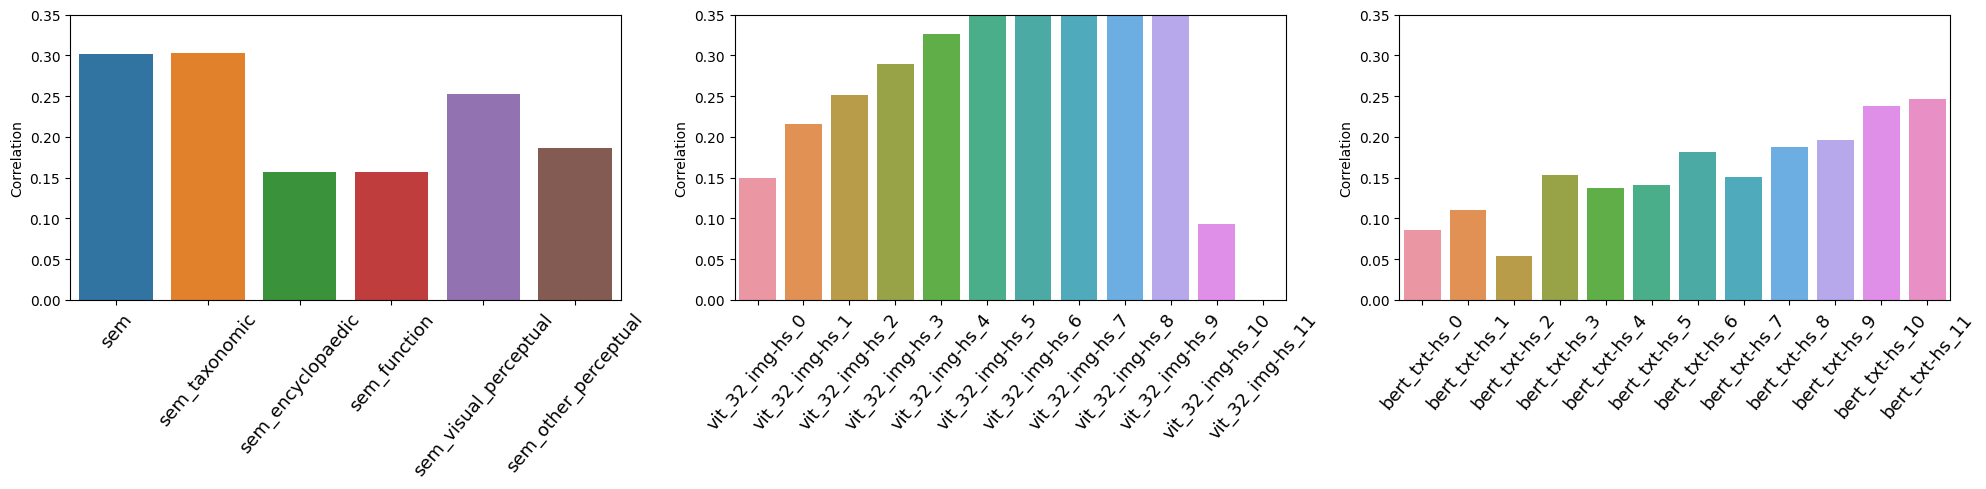

In [8]:
plot_pred_similarity('vilt')

- CLIP more similar to visual perceptual jugments, and more similar to vision model?
- ALBEF assigns more importance to language models?
- ViLT more similar to taxonomic (also to visual perceptual)
    - Highest similarity with networks

__TODO__: Add variance partitioning

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

__TODO__: Plot them together

### Can V + L models detect semantic properties of a depicted concept?

- Show feature prediction accuracies

- Show accuracies by feature type

- Add statistical tests

### How are concept and semantic-feature predictions related?

- Show correlation of predictions

- RSA imilarity between distances based on concepts and those based on features

- distances in concepts are more similar early in the network that distances in features? depends on the type of features?

- Correlate distances of feature predictions and concept predictions from distances in own's networks kayers

In [15]:
from fsk.it_match.load import get_concept_match_distance, get_feature_match_distance
from scipy.stats import spearmanr

from fsk.config import multi_models_info

corr_info = []
for m_info in multi_models_info:
    m = m_info['dnn']
    ft_dist, labels = get_concept_match_distance(
        res_path, m, synsets_imgs, center=True, 
        #from_preds=False
    )
    for stream in m_info['stream']:
        if stream == 'img':
            st = stream
        else:
            st = f'{stream}_concepts'
        for l in layers[f'{m}_{stream}']:
            l_f = rsa_path / 'distances' / f'{m}_{st}_{l}.pkl'
            with open(l_f, 'rb') as f:
                l_dist, l_labels = pickle.load(f)
            assert labels == l_labels
            corr_coef, p_val = spearmanr(ft_dist, l_dist, nan_policy='omit')
            corr_info.append([m, st, l, corr_coef, np.round(p_val, 4)])
corr_info = pd.DataFrame(corr_info, columns=['model', 'stream', 'layer', 'corr', 'pval'])
corr_info

,model,stream,layer,corr,pval
0,clip,img,hs_0,-0.096189,0.0
1,clip,img,hs_1,-0.152337,0.0
2,clip,img,hs_2,-0.169936,0.0
3,clip,img,hs_3,-0.191474,0.0
4,clip,img,hs_4,-0.193367,0.0
...,...,...,...,...,...
59,vilt,multi_concepts,hs_7,-0.489498,0.0
60,vilt,multi_concepts,hs_8,-0.462745,0.0
61,vilt,multi_concepts,hs_9,-0.461892,0.0
62,vilt,multi_concepts,hs_10,-0.472730,0.0


In [16]:
corr_info.sort_values(by='corr', ascending=True)[:20]

,model,stream,layer,corr,pval
59,vilt,multi_concepts,hs_7,-0.489498,0.0
55,vilt,multi_concepts,hs_3,-0.489480,0.0
57,vilt,multi_concepts,hs_5,-0.481785,0.0
58,vilt,multi_concepts,hs_6,-0.478178,0.0
56,vilt,multi_concepts,hs_4,-0.475555,0.0
62,vilt,multi_concepts,hs_10,-0.472730,0.0
54,vilt,multi_concepts,hs_2,-0.465114,0.0
60,vilt,multi_concepts,hs_8,-0.462745,0.0
61,vilt,multi_concepts,hs_9,-0.461892,0.0
53,vilt,multi_concepts,hs_1,-0.429774,0.0


In [14]:
# for m_info in multi_models_info:
#     for stream in m_info['stream']:
corr_info.sort_values(by='corr', ascending=False)[:20]

,model,stream,layer,corr,pval
59,vilt,multi_concepts,hs_7,0.461133,0.0
60,vilt,multi_concepts,hs_8,0.447718,0.0
62,vilt,multi_concepts,hs_10,0.445223,0.0
58,vilt,multi_concepts,hs_6,0.431211,0.0
61,vilt,multi_concepts,hs_9,0.429163,0.0
57,vilt,multi_concepts,hs_5,0.414970,0.0
11,clip,img,hs_11,0.414605,0.0
12,clip,img,c-out,0.411082,0.0
56,vilt,multi_concepts,hs_4,0.409858,0.0
55,vilt,multi_concepts,hs_3,0.397039,0.0


In [24]:
from fsk.config import multi_models_info

multi_models_info

[{'dnn': 'clip', 'stream': ['img', 'txt']},
 {'dnn': 'albef', 'stream': ['img', 'txt', 'multi']},
 {'dnn': 'vilt', 'stream': ['multi']}]

### Plot RSA

#### Compare different streams of same V+L model

In [ ]:
file = rsa_path / 'clip_img_clip_txt.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'clip_txt_concepts-hs_{n}' for n in range(12)] + ['clip_txt_concepts-c-out']
rows = [f'clip_img-hs_{n}' for n in range(12)] + ['clip_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.8, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

In [ ]:
file = rsa_path / 'albef_img_albef_txt.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'albef_txt_concepts-hs_{n}' for n in range(6)] + ['albef_txt_concepts-c-out']
rows = [f'albef_img-hs_{n}' for n in range(12)] + ['albef_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.8, 
    ax=ax
)
ax.invert_yaxis()
plt.show()

In [ ]:
file = rsa_path / 'albef_img_albef_multi.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'albef_multi_concepts-hs_{n}' for n in range(6)]
rows = [f'albef_img-hs_{n}' for n in range(12)] + ['albef_img-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.8, 
    ax=ax
)
ax.invert_yaxis()
plt.show()
#dist

In [ ]:
file = rsa_path / 'albef_txt_albef_multi.pkl'
with open(file, 'rb') as f:
    dist = pickle.load(f)
dist = pd.DataFrame(dist, columns=['model1', 'model2', 'corr', 'pval'])
dist = dist.pivot(index='model1', columns='model2', values='corr')
cols = [f'albef_multi_concepts-hs_{n}' for n in range(6)]
rows = [f'albef_txt-hs_{n}' for n in range(6)] + ['albef_txt-c-out']
dist = dist[cols]
dist = dist.reindex(rows)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(
    dist, linewidth=.5, 
    #vmax=.8, 
    ax=ax
)
ax.invert_yaxis()
plt.show()
#dist

- ALBEF conserves more textual data towards the final stages of the model
    - Peak in similarity to humans related?